# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17
51
27
21
36
48
19
26
54
30], 'Y': [y_values]})
~~~~

In [41]:
# Your code here.
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt




student_data = pd.DataFrame({'ID' : [1,2,3,4,5,6,7,8,9,10], 'ages': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

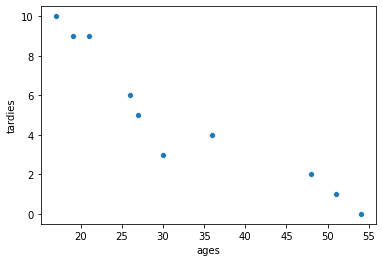

In [7]:
# Your code here.
sns.scatterplot(x='ages', y='tardies', data=student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# It looks like there is a negative correlation between the age and the tradies: the more the student is old, the less the student will be late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [36]:
# Your response here.
#correlation:
correlation=np.corrcoef(student_data['ages'],student_data['tardies'])
correlation= correlation[1][0]
#covariance:              
cov=np.cov(student_data['ages'],student_data['tardies'])
cov=cov[1][0]

print(correlation,cov)

#the covariance is only mesuring where the relationship goes between two variables, 
# while the correlation is adding the strenght of the relationship
# Here we can seen that there is a strong negative relationship between the two variables

-0.9391626886887121 -45.56666666666666


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [48]:
# Your response here.
x = student_data['ages']
y = student_data['tardies']
results = stats.linregress(x,y)
results




LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

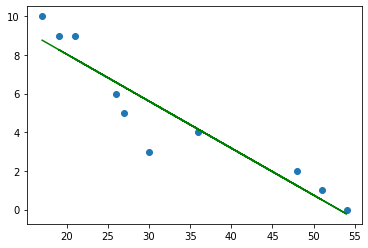

In [47]:
# Your code here.
regression_line=results[0]*x + results[1]

plt.plot(x,regression_line, c='green')
plt.scatter(x,y)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
# Your response here. 
# There is a negative correlation  of -0.93 between the age and the tardies. It is a very strong relationship.
#the model built is very strong, and age is a good predictor of tardiness. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [50]:
# Import any libraries you may need & the data
vehicles=pd.read_csv('/Users/guillaumeaubert/Documents/Ironhack/Module2/Week1/Day4_Statistics_regression/lab-regression-analysis/your-code/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [51]:
# Your response here. 
vehicles.corr()

#Fuel Barrels/year is the most correlated vairbale. Year is the less correlated variable

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

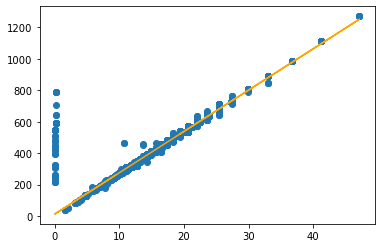

In [75]:
# Your response here. 
x=vehicles['Fuel Barrels/Year']
y=vehicles['CO2 Emission Grams/Mile']

results = stats.linregress(x,y)
results
regression_line=results[0]*x+results[1]
plt.plot(x,regression_line, c="orange")

plt.scatter(x,y)


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [80]:
# Your response here. 
import statsmodels.api as sm
x=vehicles['Fuel Barrels/Year']
y=vehicles['CO2 Emission Grams/Mile']
model=sm.OLS(y,x).fit()
model.summary()

#the most import variables are:
# the correlation coefficient: 0.98
# the R-squared (uncentered): 0.998

#vehicles.head()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Sun, 26 Jul 2020   Prob (F-statistic):                        0.00
Time:                             16:10:48   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [95]:
# Your code here.

df=pd.DataFrame({'invited': [1,3,4,6,8,9,11,14], 'attendees': [1,2,4,4,5,7,8,13]})

df['unattend']=df['invited']-df['attendees']
df

,invited,attendees,unattend
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

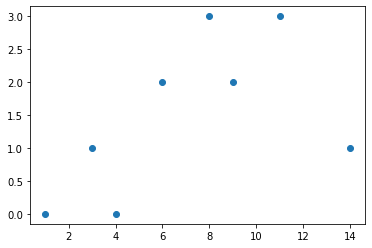

In [96]:
# Your code here.
x=df['invited']
y =df['unattend']
plt.scatter(x,y)


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

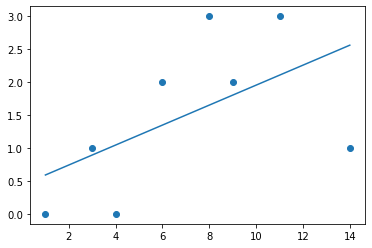

In [98]:
# Your response here. 

#it looks like there is a positive relationships between 
# the number of people invited and the number of people that do not come
results = stats.linregress(x,y)
results

regression_line=results[0]*x+results[1]


plt.plot(x,regression_line)
plt.scatter(x,y)



Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

LinregressResult(slope=0.2850467289719626, intercept=0.028037383177570208, rvalue=0.9209711329203912, pvalue=0.009121552909904887, stderr=0.060296672432541824)

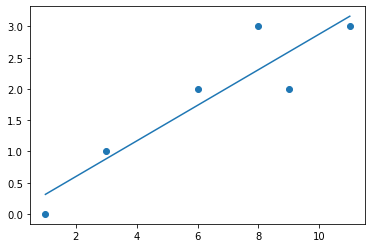

In [99]:
# Your response here. 
#the point 4 and 14 can be problematic for the model.
#df_new=

df_new=df.drop([2,7])
x=df_new['invited']
y =df_new['unattend']

results_new = stats.linregress(x,y)


regression_line_new=results_new[0]*x+results_new[1]

plt.plot(x,regression_line_new)
plt.scatter(x,y)

results_new

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# We improve the correlation coefficient by removing the two points. 
# The regression line is now better centered around the points